Link here: <https://projecteuler.net/problem=144>.

Algorithm:

- state of ray is (point, direction)
- iteration of the ray gives a new ray
- test if the new intersection is within the right range

# Modelling 

Modelling:

- a point is a tuple with 2 coordinates
- a vector is a tuple with 2 coordinates

In [3]:
from collections import namedtuple
Ray = namedtuple('Ray', 'point, direction')

In [4]:
r = Ray((0.1, 0.2), (0.2, 0.4))

In [5]:
r.point

(0.1, 0.2)

In [6]:
r.direction

(0.2, 0.4)

# Main loop 

In [139]:
def iterate(ray, on_ellipse=True):
    "Computes the next state of the ray."
    new_point = compute_intersection(ray, on_ellipse=on_ellipse)
    normal = compute_normal(new_point)
    new_direction = compute_reflexion(ray, normal)
    return Ray(new_point, new_direction)

#TODO: compute_intersection, compute_normal, compute_reflexion

# Computing the intersection 

In [140]:
import sympy

In [141]:
x, y = sympy.symbols('x, y')

In [142]:
e = 4 * x**2 + y ** 2 - 100
e

4*x**2 + y**2 - 100

Let's compute the first direction:

In [143]:
import numpy as np

In [144]:
d = np.array([1.4, -9.6]) - np.array([0, 10.1])
d

array([  1.4, -19.7])

In [20]:
p = np.array([0, 10.1])

In [24]:
l = (x - p[0])*(-d[1]) + (y - p[1])*d[0]

Let's now solve the system of equations:

In [31]:
solutions = sympy.solve([e, l])
solutions

[{y: 9.99998989720405, x: 0.00710731694996590},
 {y: -9.60000000000000, x: 1.40000000000000}]

How can we choose the right solution? Easy, just use the one that has a positive scalar product.

In [27]:
np.sum(d * np.array([0.00710731694996590, 9.99998989720405]))

-196.98985073118985

In [28]:
np.sum(d * np.array([1.40000000000000, -9.60000000000000]))

191.07999999999998

In [34]:
solutions[0][x]

0.00710731694996590

In [35]:
solutions[0][y]

9.99998989720405

In [ ]:
sympy.lambdify()

In [123]:
def compute_intersection(ray, on_ellipse=True):
    "Computes intersection point between ray and ellipse, assuming ray starts on ellipse."
    x, y = sympy.symbols('x, y')
    e = 4 * x**2 + y ** 2 - 100
    p = ray.point
    d = ray.direction
    l = (x - p[0])*(-d[1]) + (y - p[1])*d[0]
    solutions = sympy.solve([e, l])
    if on_ellipse:
        for solution in solutions:
            dist = np.linalg.norm(np.array([solution[x], solution[y]]) - np.array(p))
            if dist > 1e-1:
                return (solution[x], solution[y])
    else:
        for solution in solutions:
            scalarprod = np.sum(np.array(d) * np.array([solution[x], solution[y]]))
            if scalarprod > 0:
                return (solution[x], solution[y])
    raise ValueError('no intersection found!')

In [124]:
r = Ray(p, d)

In [125]:
compute_intersection(r)

(0.00710731694996590, 9.99998989720405)

In [126]:
compute_intersection(r, on_ellipse=False)

(1.40000000000000, -9.60000000000000)

# Computing the normal 

We already know the slope of the tangent to the ellipse: 

$$
m = {-4x \over y}
$$

In [127]:
def compute_normal(point):
    "Returns normal vector to ellipse at given point."
    x, y = point
    n = -np.array((x / 25., y / 100.))
    n /= np.linalg.norm(n)
    return n.astype(np.float64)

In [128]:
compute_normal((0, 10))

array([-0., -1.])

Let's plot some normals here:

In [129]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [130]:
from matplotlib.patches import Ellipse

<IPython.core.display.Javascript object>


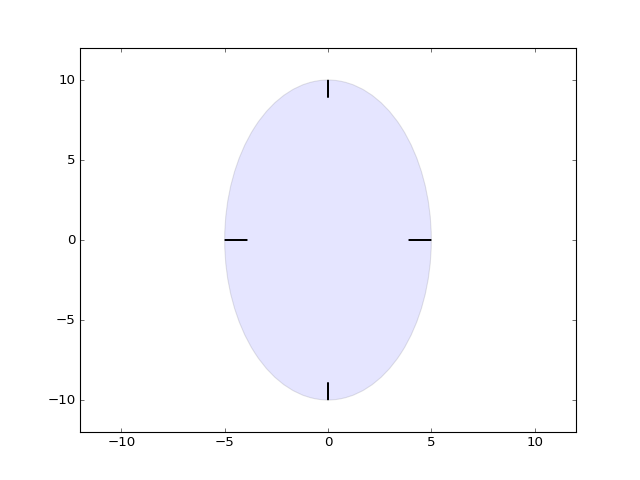

In [131]:
plt.figure()
plt.gca().add_patch(Ellipse((0, 0), 10, 20,  alpha=0.1))
plt.xlim(-12, 12)
plt.ylim(-12, 12)

def plot_normal(pt):
    x, y = pt
    n = compute_normal(pt)
    plt.arrow(x, y, n[0], n[1], head_width=0.05, head_length=0.1)
    
plot_normal((0, 10))
plot_normal((0, -10))
plot_normal((5, 0))
plot_normal((-5, 0))

In [91]:
compute_intersection(r)

(1.40000000000000, -9.60000000000000)

In [132]:
compute_normal(compute_intersection(r))

array([-0.00284292, -0.99999596])

# Computing the reflected vector 

In [148]:
def compute_reflexion(ray, normal):
    "Returns the new direction vector."
    i = np.array(ray.direction)
    n = np.array(normal)
    i -= 2 * np.sum(i * n) * n
    return (i[0], i[1])

Let's test this:

In [134]:
compute_reflexion(r, compute_normal(compute_intersection(r)))

(1.5119878928830672, 19.691721423272657)

# Putting it all together 

In [135]:
r

Ray(point=array([  0. ,  10.1]), direction=array([  1.4, -19.7]))

In [136]:
iterate(r)

Ray(point=(0.00710731694996590, 9.99998989720405), direction=(1.5119878928830672, 19.691721423272657))

In [137]:
def plot_ray(ray):
    "Plots a ray."
    x, y = ray.point[0], ray.point[1]
    u, v = ray.direction[0], ray.direction[1]
    plt.arrow(x, y , u, v, head_width=0.05, head_length=0.1)

<IPython.core.display.Javascript object>


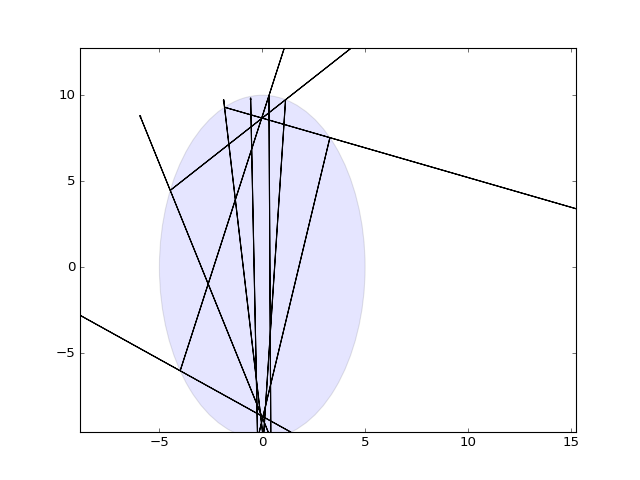

In [147]:
plt.figure()
plt.gca().add_patch(Ellipse((0, 0), 10, 20,  alpha=0.1))
plt.xlim(-12, 12)
plt.ylim(-12, 12)

rr = iterate(r, on_ellipse=False)
for i in range(10):
    plot_ray(rr)
    rr = iterate(rr)

Let's just plot the points of intersection as they get generated:

In [151]:
points = []
rr = iterate(r, on_ellipse=False)
for i in range(10):
    rr = iterate(rr)
    points.append(rr.point)

<IPython.core.display.Javascript object>


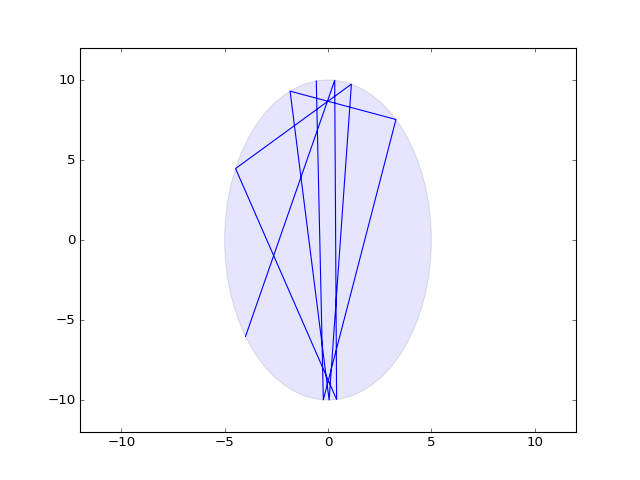

In [153]:
plt.figure()
plt.gca().add_patch(Ellipse((0, 0), 10, 20,  alpha=0.1))
plt.xlim(-12, 12)
plt.ylim(-12, 12)
plt.plot(np.array(points)[:, 0], np.array(points)[:, 1])

In [154]:
from ipywidgets import interact

In [183]:
%matplotlib inline

<IPython.core.display.Javascript object>


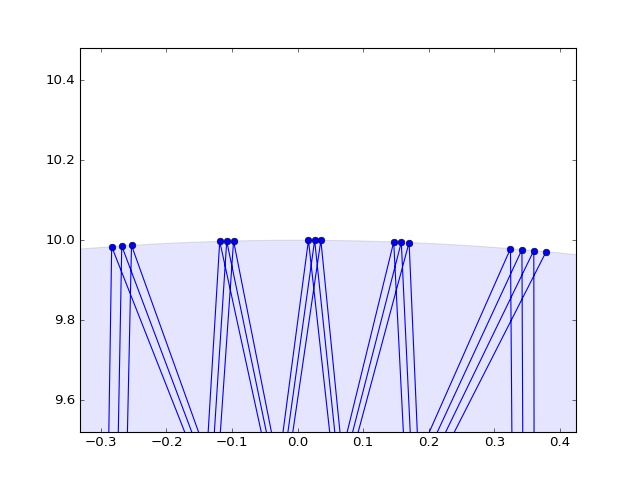

In [208]:
@interact
def plot_incremental_rays(index=(1, len(points) - 1)):
    plt.figure()
    plt.gca().add_patch(Ellipse((0, 0), 10, 20,  alpha=0.1))
    plt.xlim(-12, 12)
    plt.ylim(-12, 12)
    plt.plot(np.array(points)[:index, 0], np.array(points)[:index, 1], '-o')

# Stopping criterion 

In [211]:
def is_out(ray):
    "Checks whether the ray has escaped the ellipse."
    x, y = ray.point
    return (-0.01 <= x <= 0.01) and y > 0

In [212]:
is_out(Ray((0.011, 0.1), (0, 0)))

False

# Finding an answer 

In [213]:
r

Ray(point=array([  0. ,  10.1]), direction=array([  1.4, -19.7]))

In [214]:
points = []
rr = iterate(r, on_ellipse=False)
points.append(rr.point)
while True:
    rr = iterate(rr)
    points.append(rr.point)
    if is_out(rr):
        break
    print('.', end='')

.................................................................................................................................................................................................................................................................................................................................................................

In [217]:
print("solution is {}".format(len(points) - 1))

solution is 354


In [220]:
points[-1]

(-0.00984876093143555, 9.99998060036281)

In [205]:
%matplotlib notebook

<IPython.core.display.Javascript object>


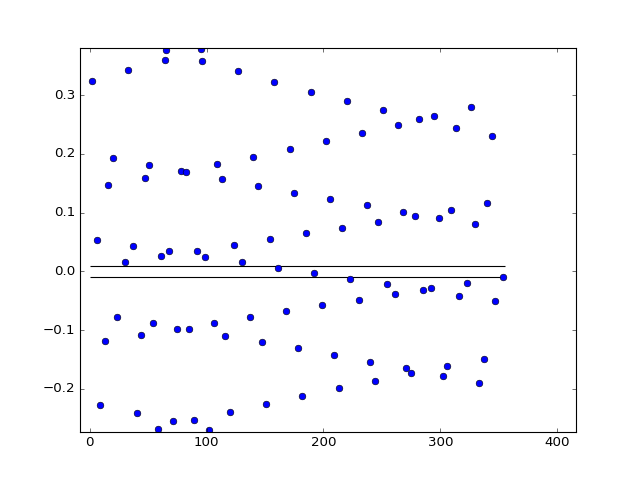

In [221]:
plt.figure()
plt.plot(np.array(points)[:, 0], 'o')
plt.hlines([0.01, -0.01], 0, len(points))

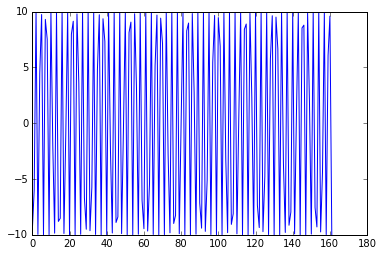

In [190]:
plt.figure()
plt.plot(np.array(points)[:, 1])

<IPython.core.display.Javascript object>


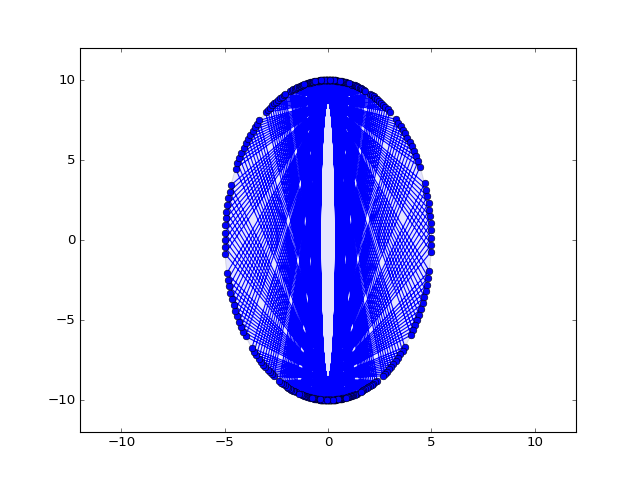

In [222]:
interact(plot_incremental_rays,
         index=(1, len(points) - 1))

In [218]:
points

[(1.40000000000000, -9.60000000000000),
 (-3.99059761936164, -6.02499149886379),
 (0.324582878083967, 9.97890694520291),
 (0.416490435780230, -9.96524675397526),
 (-4.47344349721357, 4.46690195873498),
 (1.13233786470162, 9.74018705367879),
 (0.0536506662265838, -9.99942430463143),
 (-1.83444237340102, 9.30264933847790),
 (3.28824950976850, 7.53323706291186),
 (-0.226491477766366, -9.98973505364366),
 (-0.566604327511133, 9.93558443898408),
 (4.90431042704293, -1.94703799161500),
 (-0.852425522672158, -9.85360253476810),
 (-0.118726109219474, 9.99718042469768),
 (2.37474089458685, -8.80013765428174),
 (-2.61551238787611, -8.52269791764712),
 (0.146551577819212, 9.99570360405684),
 (0.761081905005412, -9.88347192718699),
 (-4.98153079674417, -0.858722122899896),
 (0.636896896911528, 9.91854068756175),
 (0.193346746067536, -9.99252061009335),
 (-3.01616727994218, 7.97564666704993),
 (2.03349686334379, 9.13562050585968),
 (-0.0783865432841545, -9.99877103444858),
 (-1.01380874000134, 9.79

In [219]:
len(points)

355

# Let's do an animation

In [224]:
%matplotlib inline

In [229]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

duration = 5

fig, ax = plt.subplots(figsize=(6, 4), facecolor='white', dpi=150)
plt.tight_layout()
def make_frame_mpl(t):
    index = int(t / duration * (len(points) - 1))
    ax.clear()
    ax.add_patch(Ellipse((0, 0), 10, 20,  alpha=0.1))
    ax.set_xlim(-12, 12)
    ax.set_ylim(-12, 12)
    ax.plot(np.array(points)[:index, 0], np.array(points)[:index, 1], '-o')
    return mplfig_to_npimage(fig) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
plt.close(fig)
animation.ipython_display(fps=25, width=800)

 99%|███████████████████████████████████████▋| 125/126 [00:10<00:00, 11.57it/s]
